<a href="https://colab.research.google.com/github/H-y-hoon/keras_mnist/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN으로 MNIST데이터셋 분석하기

In [2]:
#데이터 불러오기(mnist 손글씨 데이터)
from keras.datasets import mnist

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import os
import numpy

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


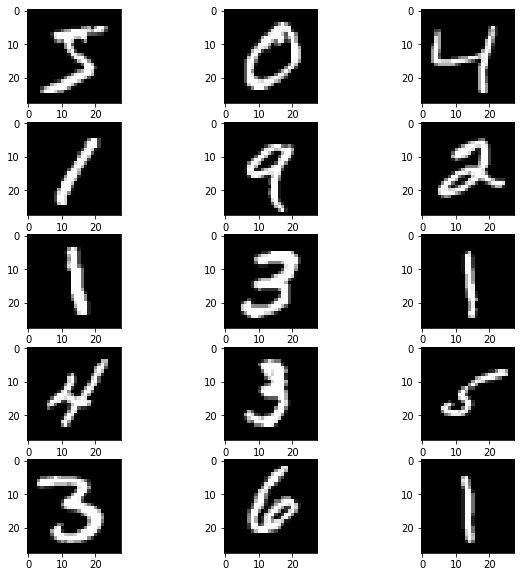

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [6]:
#시각화로 데이터 확인
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5,3,c+1)
        plt.imshow(x_train[c], cmap='gray')
        c+=1
    
plt.show()

print(y_train[:15])

# 1. 데이터 전처리

In [7]:
#Normalization
x_train = x_train / 255 
x_test = x_test / 255

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
#reshape
# reshape : [samples][width][height][channels]
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [10]:
#Label Encoding
#0~9 사이의 이미지 레이블 데이터를 10개의 숫자 벡터 값으로 변형시켜 주기 위해 원핫인코딩을 진행
#CNN모델 입력형태로 변형시켜주기 위함
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

# 2. Create Model

In [16]:
#create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [17]:
model = convolutional_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               230500    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 231,926
Trainable params: 231,926
Non-trainable params: 0
________________________________________________

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 19s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0460 - val_accuracy: 0.9899 - 19s/epoch - 64ms/step
Epoch 2/10
300/300 - 18s - loss: 1.6811e-04 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9903 - 18s/epoch - 61ms/step
Epoch 3/10
300/300 - 19s - loss: 1.1273e-04 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9901 - 19s/epoch - 62ms/step
Epoch 4/10
300/300 - 18s - loss: 8.8614e-05 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9901 - 18s/epoch - 61ms/step
Epoch 5/10
300/300 - 18s - loss: 7.2755e-05 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9902 - 18s/epoch - 61ms/step
Epoch 6/10
300/300 - 19s - loss: 6.0942e-05 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 0.9903 - 19s/epoch - 65ms/step
Epoch 7/10
300/300 - 18s - loss: 5.1916e-05 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9903 - 18s/epoch - 61ms/step
Epoch 8/10
300/300 - 18s - loss: 4.4438e-05 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9

In [22]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("정확도: {} \n 손실률: {}".format(scores[1], 100-scores[1]*100))

정확도: 0.9894000291824341 
 손실률: 1.0599970817565918


# 모델 시각화

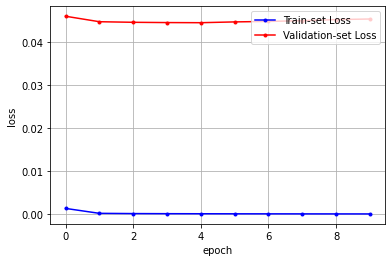

In [32]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()